# Face Detection

## Load Cascade Classfier 

In [1]:
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt

In [2]:
#load cascade classifier training file for haarcascade 
haar_frontface_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

## Function to Convert Image

In [3]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def convertToGray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Function to Detect Image

In [8]:
def face_detect(f_cascade,image,scaleFactor):
    image_gray = convertToGray(image)
    
    faces = f_cascade.detectMultiScale(image_gray, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x,y),(x+w,y+h),(0,255,0),2)
    
    return image    

## Test Image Detection Results

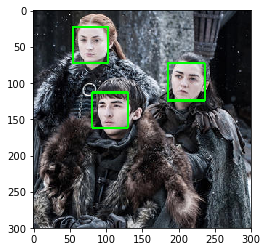

In [9]:
# Load image want to detect
image_1 = cv2.imread('image_group1.jpg')
## photo is downloaded from: http://bgr.com/2018/03/13/game-of-thrones-season-8-deaths-teased-hbo/

image_detected = face_detect(haar_frontface_cascade, image_1, 1.2)

## Convert to Color Image
image_color = convertToRGB(image_detected)

# Show detected image
plt.imshow(image_color)
plt.show()

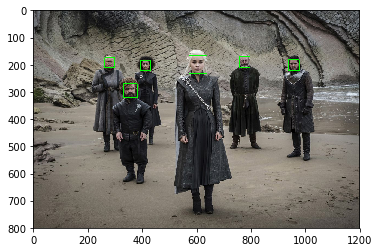

In [10]:
# Load image want to detect
image_2 = cv2.imread('image_group2.jpg')
## photo is downloaded from: 
#https://www.theverge.com/2017/8/20/16125490/game-of-thrones-fan-service-jonerys-benioff-weiss-versus-grrm

image_detected = face_detect(haar_frontface_cascade, image_2, 1.1)

## Convert to Color Image
image_color = convertToRGB(image_detected)

# Show detected image
plt.imshow(image_color)
plt.show()

# Face Identification

In [11]:
import os
#numpy to convert python lists to numpy arrays as it is needed by OpenCV face recognizers
import numpy as np

## Train Image Model

In [12]:
def detect_face(img):
#convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
  #load OpenCV face detector, I am using LBP which is fast
#there is also a more accurate but slow: Haar classifier
    face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')
 
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
    if (len(faces) == 0):
        return None, None 
#extract the face area
    (x, y, w, h) = faces[0]
 
   #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [13]:
def prepare_training_data(data_folder_path):
 
    #------STEP-1--------
#get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
 
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
 
    #let's go through each directory and read images within it
    for dir_name in dirs:
 
    #------STEP-2--------
    #extract label number of subject from dir_name
    #format of dir name = slabel
    #, so removing letter 's' from dir_name will give us label
        label = dir_name.replace(" ", "_")
 
    #build path of directory containing images for current subject subject
    #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
 
    #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
 
    #------STEP-3--------
    #go through each image name, read image, 
    #detect face and add face to list of faces
        for image_name in subject_images_names:
 
    #build image path
    #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name
 
    #read image
            image = cv2.imread(image_path)
 
    #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
 
    #detect face
            face, rect = detect_face(image)
 
    #------STEP-4--------
    #for the purpose of this tutorial
    #we will ignore faces that are not detected
            if face is not None:
                faces.append(face)
    #add label for this face
                labels.append(label)
 
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
 
    return faces, labels

In [14]:
print("Preparing data...")
faces, labels = prepare_training_data("game_of_thrones_training")
print("Data prepared")
 
#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  76
Total labels:  76


In [15]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

## Convert Image labels into integer

In [16]:
lab_num = []
lab_num.append(0)
lab = 0
for i in range(1,len(labels)):
    if labels[i] != labels[i-1]:
        lab = lab + 1
    lab_num.append(lab)

label_sub = np.array(labels)
label_name = np.unique(label_sub )
print(label_name)

['Arya_Stark' 'Cersei_Lannister' 'Daenerys_Targaryen' 'Jon_Snow'
 'Tyrion_Lannister']


In [17]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(lab_num))

In [18]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    #function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
     cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

## Predict Name of Character

In [19]:
def predict(test_img):
#make a copy of the image as we don't want to change original image
    img = test_img.copy()
#detect face from the image
    face, rect = detect_face(img)
 
    #predict the image using our face recognizer 
    label= face_recognizer.predict(face)
    #get name of respective label returned by face recognizer
    label_text = label_name[label[0]]
 
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)
 
    return img

Prediction complete


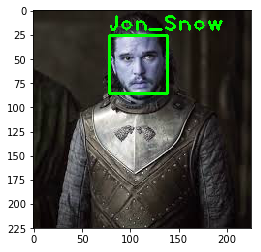

In [20]:
test_img1 = cv2.imread("image1.jpg")
test_img2 = cv2.imread("image2.jpg")
 
#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Prediction complete")
 
#display both images
#cv2.imshow(label_name[1], predicted_img1)
#cv2.imshow(label_name[2], predicted_img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(predicted_img1)
plt.show()

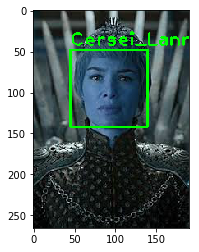

In [21]:
plt.imshow(predicted_img2)
plt.show()